In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from conformal_region_designer.conformity_optimizer import ConformalRegion
from conformal_region_designer.utils import shuffle_split_testing

import pickle

In [2]:
data_folder = '../../conformal_region_designer/case_studies/f16/data/'
residuals_save_folder = data_folder + 'testResiduals/'

In [3]:
Z_eval = pickle.load(open(residuals_save_folder + 'residuals.pkl', 'rb'))
Z_eval = np.array(Z_eval)
cal_one_s, cal_two_s, test_s = 0.33, 0.33, 0.34
Z_cal_one = Z_eval[:int(cal_one_s * len(Z_eval))]
Z_cal_two = Z_eval[int(cal_one_s * len(Z_eval)):int((cal_one_s + cal_two_s) * len(Z_eval))]
Z_test = Z_eval[int((cal_one_s + cal_two_s) * len(Z_eval)):]
Z_shuffle = np.concatenate((Z_cal_two, Z_test))
DELTA = 0.95

In [4]:
print('Z_eval.shape', Z_eval.shape)
print('Z_cal_one.shape', Z_cal_one.shape)
print('Z_cal_two.shape', Z_cal_two.shape)
print('Z_test.shape', Z_test.shape)

Z_eval.shape (1900, 2)
Z_cal_one.shape (627, 2)
Z_cal_two.shape (627, 2)
Z_test.shape (646, 2)


In [5]:
from conformal_region_designer.utils.conformal import conformalized_quantile

ncs_cal_one = np.linalg.norm(Z_cal_one, axis=1)
ncs_cal_two = np.linalg.norm(Z_cal_two, axis=1)
ncs_cal = np.concatenate((ncs_cal_one, ncs_cal_two))
ncs_test = np.linalg.norm(Z_test, axis=1)
conf_quant = conformalized_quantile(len(Z_cal_two) + len(Z_cal_one), DELTA)
boundary = np.quantile(ncs_cal, conf_quant)
print('boundary', boundary)
print("Area: ", np.pi*(boundary**2))

boundary 0.2556540973163678
Area:  0.20533140914419748


In [6]:
print('Z_eval.shape', Z_eval.shape)

Z_eval.shape (1900, 2)


Text(0.5, 1.0, 'F16 Errors - 1900 points')

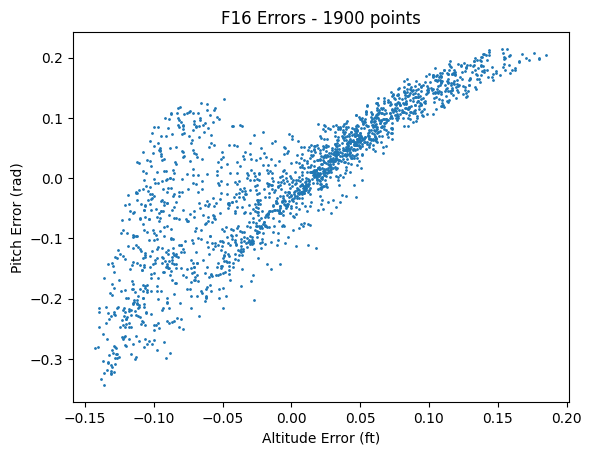

In [7]:
plt.scatter(Z_eval[:, 0], Z_eval[:, 1], s=1)
plt.xlabel("Altitude Error (ft)")
plt.ylabel("Pitch Error (rad)")
plt.title(f"F16 Errors - {len(Z_eval)} points")

Total Weight Sum: 0.974561769588933


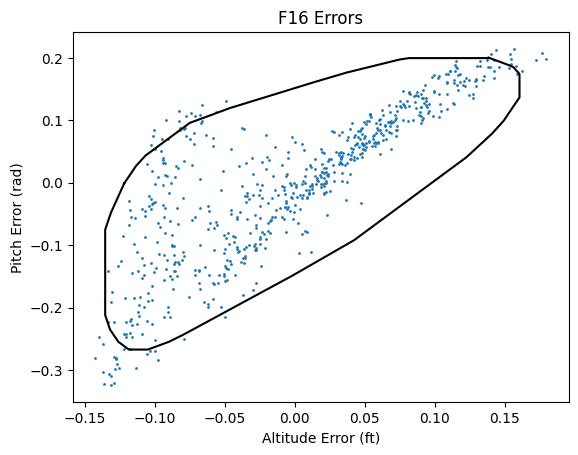

In [8]:
from conformal_region_designer.density_estimation import KDE
de = KDE(bw_factor=0.2)
pcr = ConformalRegion(de=de, st='convexhull', delta=DELTA)
pcr.fit(Z_cal_one)
pcr.conformalize(Z_cal_two)
plt.scatter(Z_test[:, 0], Z_test[:, 1], s=1)
plt.xlabel("Altitude Error (ft)")
plt.ylabel("Pitch Error (rad)")
plt.title(f"F16 Errors")
for i in range(len(pcr.shapes)):
    pcr.shapes[i].plot(ax=plt.gca())
cvxpcr = pcr

  0%|          | 0/1000 [00:00<?, ?it/s]

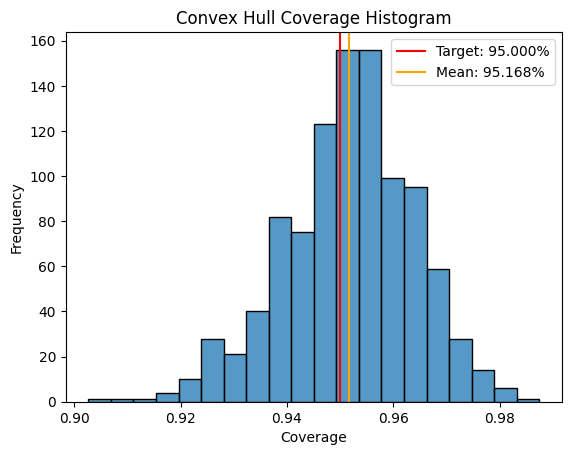

In [9]:
cvxcoverages = shuffle_split_testing(pcr, Z_shuffle, 1000, 0.5, 1337)
sns.histplot(cvxcoverages, bins=20)
plt.axvline(x=DELTA, color="red", label=f"Target: {DELTA:.3%}")
plt.axvline(x=np.mean(cvxcoverages), color="orange", label=f"Mean: {np.mean(cvxcoverages):.3%}")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.title("Convex Hull Coverage Histogram")
plt.legend()

Total Weight Sum: 0.974561769588933


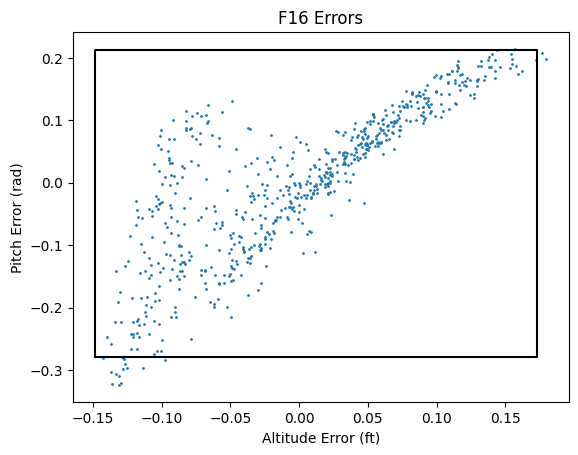

In [10]:
from conformal_region_designer.density_estimation import KDE
de = KDE(bw_factor=0.2)
pcr = ConformalRegion(de=de, st='hyperrectangle', delta=DELTA)
pcr.fit(Z_cal_one)
pcr.conformalize(Z_cal_two)
plt.scatter(Z_test[:, 0], Z_test[:, 1], s=1)
plt.xlabel("Altitude Error (ft)")
plt.ylabel("Pitch Error (rad)")
plt.title(f"F16 Errors")
for i in range(len(pcr.shapes)):
    pcr.shapes[i].plot(ax=plt.gca())
hrpcr = pcr

  0%|          | 0/1000 [00:00<?, ?it/s]

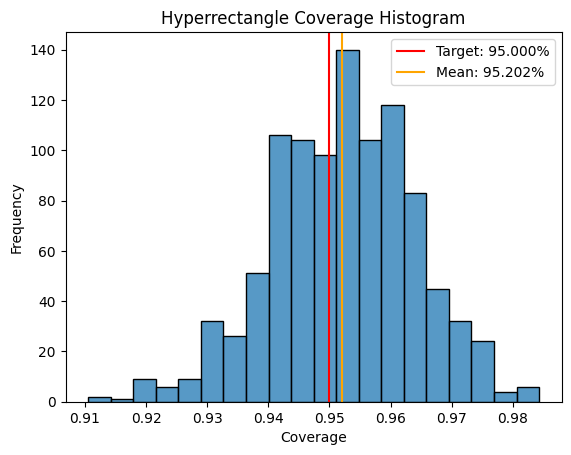

In [11]:
hrcoverages = shuffle_split_testing(pcr, Z_shuffle, 1000, 0.5, 1337)
sns.histplot(hrcoverages, bins=20)
plt.axvline(x=DELTA, color="red", label=f"Target: {DELTA:.3%}")
plt.axvline(x=np.mean(hrcoverages), color="orange", label=f"Mean: {np.mean(hrcoverages):.3%}")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.title("Hyperrectangle Coverage Histogram")
plt.legend()

Total Weight Sum: 0.974561769588933


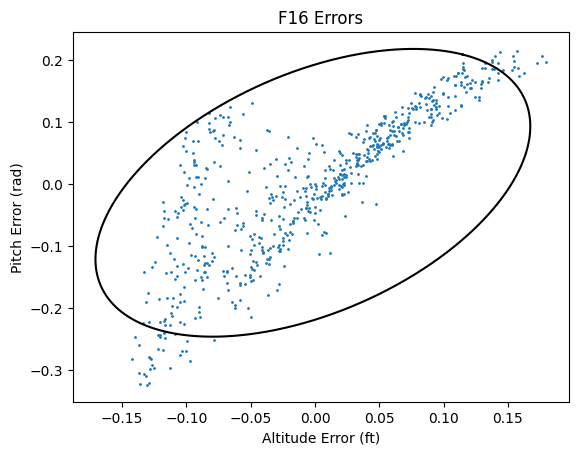

In [12]:
from conformal_region_designer.density_estimation import KDE
de = KDE(bw_factor=0.2)
pcr = ConformalRegion(de=de, st='ellipse', delta=DELTA)
pcr.fit(Z_cal_one)
pcr.conformalize(Z_cal_two)
plt.scatter(Z_test[:, 0], Z_test[:, 1], s=1)
plt.xlabel("Altitude Error (ft)")
plt.ylabel("Pitch Error (rad)")
plt.title(f"F16 Errors")
for i in range(len(pcr.shapes)):
    pcr.shapes[i].plot(ax=plt.gca())
ellpcr = pcr

  0%|          | 0/1000 [00:00<?, ?it/s]

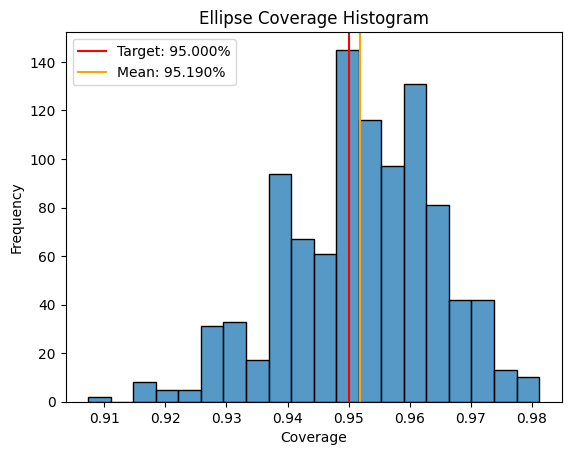

In [13]:
ellcoverages = shuffle_split_testing(pcr, Z_shuffle, 1000, 0.5, 1337)
sns.histplot(ellcoverages, bins=20)
plt.axvline(x=DELTA, color="red", label=f"Target: {DELTA:.3%}")
plt.axvline(x=np.mean(ellcoverages), color="orange", label=f"Mean: {np.mean(ellcoverages):.3%}")
plt.xlabel("Coverage")
plt.ylabel("Frequency")
plt.title("Ellipse Coverage Histogram")
plt.legend()

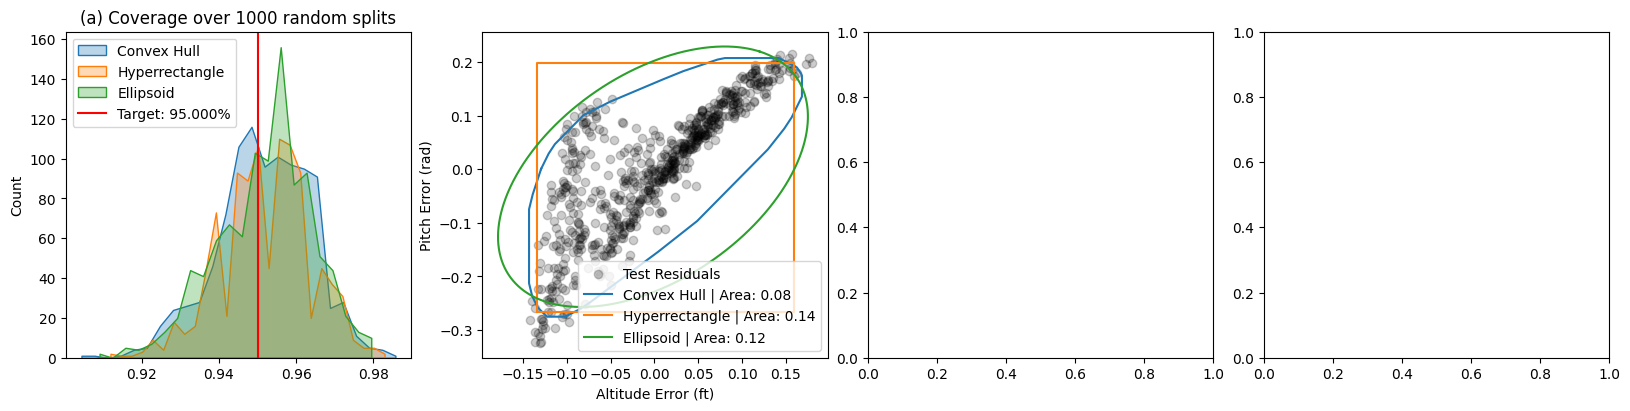

In [14]:
fig = plt.figure(figsize=(30, 4), constrained_layout=True)
from cProfile import label
from matplotlib import gridspec
gs = gridspec.GridSpec(1,8, figure=fig)
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])
ax4 = plt.subplot(gs[0, 4])

sns.histplot(cvxcoverages, element="poly", label="Convex Hull", alpha=0.3, ax=ax1, color="C0")
sns.histplot(hrcoverages, element="poly", label="Hyperrectangle", alpha=0.3, ax=ax1, color="C1")
sns.histplot(ellcoverages, element="poly", label="Ellipsoid", alpha=0.3, ax=ax1, color="C2")
ax1.axvline(x=DELTA, color="red", label=f"Target: {DELTA:.3%}")
ax1.legend(loc='upper left')
ax1.set_title("(a) Coverage over 1000 random splits")

i=1
ax2.scatter(Z_test[:, 0], Z_test[:, 1], alpha=0.2, color="black", label=f"Test Residuals")
for i in range(len(pcr.shapes)):
    cvxpcr.shapes[i].plot(ax=ax2, label=f"Convex Hull | Area: {cvxpcr.shapes[i].volume():.2f}", color="C0")
    hrpcr.shapes[i].plot(ax=ax2, label=f"Hyperrectangle | Area: {hrpcr.shapes[i].volume():.2f}", color="C1")
    ellpcr.shapes[i].plot(ax=ax2, label=f"Ellipsoid | Area: {ellpcr.shapes[i].volume():.2f}", color="C2")

ax2.set_xlabel("Altitude Error (ft)")
ax2.set_ylabel("Pitch Error (rad)")
ax2.legend(loc='lower right')

In [15]:
figure_data = {
    'cvxcoverages': cvxcoverages,
    'hrcoverages': hrcoverages,
    'ellcoverages': ellcoverages,
    'Z_test': Z_test,
    'cvxpcr': cvxpcr,
    'hrpcr': hrpcr,
    'ellpcr': ellpcr,
    'DELTA': DELTA
}
pickle.dump(figure_data, open("f16_experiments.pkl", "wb"))

In [16]:
cvxpcr.print_times()

DE time             : 0.29909420013427734
CL time             : 8.058107614517212
ST time             : 0.015019655227661133
Score time          : 0.0010938644409179688
Conformalize time   : 0.0007009506225585938
Total time          : 8.374016284942627


In [17]:
hrpcr.print_times()

DE time             : 0.29536867141723633
CL time             : 7.055333852767944
ST time             : 0.0006325244903564453
Score time          : 0.00033736228942871094
Conformalize time   : 0.0004038810729980469
Total time          : 7.352076292037964


In [18]:
ellpcr.print_times()

DE time             : 0.29670047760009766
CL time             : 7.21617865562439
ST time             : 1.2389705181121826
Score time          : 0.0003681182861328125
Conformalize time   : 0.0008747577667236328
Total time          : 8.753092527389526


In [19]:
from time import time
start = time()
cov = (cvxpcr.calculate_scores(Z_test)<0).mean()
end = time()
print(f'Coverage: {cov:.3f} | Time: {end-start:.8f}s')

Coverage: 0.949 | Time: 0.00174022s


In [20]:
from time import time
start = time()
cov = (hrpcr.calculate_scores(Z_test)<0).mean()
end = time()
print(f'Coverage: {cov:.3f} | Time: {end-start:.8f}s')

Coverage: 0.952 | Time: 0.00118732s


In [21]:
from time import time
start = time()
cov = (ellpcr.calculate_scores(Z_test)<0).mean()
end = time()
print(f'Coverage: {cov:.3f} | Time: {end-start:.8f}s')

Coverage: 0.949 | Time: 0.00112510s


In [22]:
Z_test.shape

(646, 2)